<a href="https://colab.research.google.com/github/delusidiot/DelusidiotBlog/blob/master/Start_with_tensorflow2_0_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow를 시작 합니다.

In [5]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


## Tensorflow import
기본으로 tensorflow를 import하면 1.15를 가지고 옵니다. IPython부터 지원하는 명령어를 사용하여 2.x버전을 선택합니다.

1.x 버전과 2.x 버전의 차이는 크기 때문에 1.x 버전의 사용하는 방법은 모두를 위한 머신러닝에서 학습하시기 바랍니다.

머신러닝의 기본 개념도 모두를 위한 머신러닝을 추천합니다.

In [6]:
print(tf.__version__)

2.1.0


# Tensorflow 기초
## 난수생성
텐서 플로에서 난수를 생성하는 방법 2가지를 소개합니다. 하나는 균일 분포 다른 하나는 정규 분포를 이용하는 방법입니다.

In [7]:
rand_uniform = tf.random.uniform([1],0,1) # 균일분포
print('rand_uniform : ',rand_uniform)

rand_uniform :  tf.Tensor([0.5439502], shape=(1,), dtype=float32)


정규분포는 shape, min, max 값 등을 입력합니다.

In [8]:
rand_normal = tf.random.normal([1],0,1) # 정규분포
print('rand_normal : ',rand_normal)

rand_normal :  tf.Tensor([-0.0035288], shape=(1,), dtype=float32)


균일분포는 shape, mean, standard deviation(표준편차)

## 뉴런 생성
이전에는 퍼셉트론이라고도 불렸습니다. 입력을 받아서 계산 후 출력을 반환하는 단순한 구조입니다.

신경망은 뉴런이 여러 개 모여 Layer를 구성한 후, 이 레이어가 다시 모여 구성된 
형태입니다. 뉴런과 레이어를 각각 한국어로 신경 세포와 층이라고도 부르지만 저는 뉴런과 레이어라고만 표기하겠습니다.


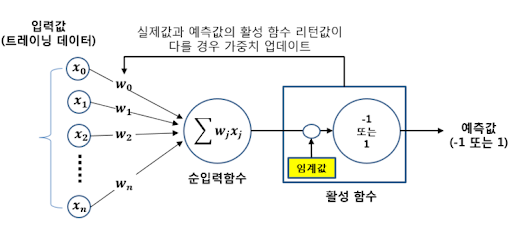

뉴런은 Input, weight, activation function, output으로 구성됩니다.
가장 간단한 형태의 뉴런은 입력에 가중치를 곱한 뒤 활성화 함수를 취하면 출력을 얻을 수 있습니다.

활성함수는 대표적으로 시그모이드, ReLU등을 주로 사용하게 될 것입니다. 신경망 초창기에 시그모이드가 주로 사용되었지만 은닉층을 다수 사용하는 딥러닝 시대가 되면서 ReLU가 더 많이 사용되고 있습니다.

간단하게 시그모이드 함수를 구현하고 사용해 보겠습니다.

In [0]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [10]:
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x*w)
print(output)

0.1214393190108608


입력 x는 1을 넣고 가중치는 w로 초기값은 정규 분포의 랜덤값을 넣습니다. 실제출력(ouput)으로 나온 값은 기대출력인 y값과의 차이인 값을 에러라고 합니다. 이 에러가 0에 가까워지게 해서 출력으로 기댓값에 가까운 값을 얻는것이 목표입니다.

뉴런은 결국 w 값입니다. 이제 이 w를 변화시켜야 하는데 가장 간단한 경사 하강법이라는 방법을 사용할 것입니다. 이것은 w에 입력과 학습률과 에러를 곱한 값을 더해주는 것입니다. 학습률은 w를 업데이트하는 정도로, 큰 값으로 설정하면 학습이 빨리 되지만 과도한 학습으로 적정한 수치를 벗어날 우려가 있고, 너무 작은 값으로 설정하면 학습 속도가 너무 느려 질 수 있습니다.

저는 학습값을 0.1로 지정하여 사용하겠습니다.

In [11]:
for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x* 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 -0.057616330160885326 0.057616330160885326
199 -0.03715007786943536 0.03715007786943536
299 -0.027310929335693405 0.027310929335693405
399 -0.021558787448294477 0.021558787448294477
499 -0.017794035824535974 0.017794035824535974
599 -0.01514176746426856 0.01514176746426856
699 -0.013173821852209418 0.013173821852209418
799 -0.011656339212179333 0.011656339212179333
899 -0.010450918253146705 0.010450918253146705
999 -0.009470492478286525 0.009470492478286525


1000번동안 반복하는 동안 error값이 점차 기대치인 y에 가까워지는 모습을 볼 수 있습니다. 

하지만 이방법은 x 값이 0일때 문제가 발생 합니다. w = w + x* 0.1 * error 에서 x의 값은 0이기 때문에 w의 값은 변화하지 않게 됩니다. 이 문제를 해결하기 위해 편향 이라는 것을 뉴런에 넣어 줍니다.

편향은 입력으로 늘 한쪽으로 치우친 고정된 값을 받아서 입력으로 0을 받았을 때 뉴런이 아무것도 배우지 못하느 상황을 방지합니다. 보편적으로 1을 많이 사용합니다. 관용적으로 해당 변수는 bias의 앞글자인 b를 씁니다.

In [12]:
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)
print( w, " ", b)

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

tf.Tensor([1.2543176], shape=(1,), dtype=float32)   tf.Tensor([0.59544295], shape=(1,), dtype=float32)
99 0.09034541854424305 0.909654581455757
199 0.04892034916765231 0.9510796508323477
299 0.03326814368955733 0.9667318563104427
399 0.025135661142945742 0.9748643388570543
499 0.020173444123122497 0.9798265558768775
599 0.01683646636247116 0.9831635336375288
699 0.014441098300656985 0.985558901699343
799 0.012639282449358191 0.9873607175506418
899 0.011235270929152108 0.9887647290708479
999 0.010110797145808315 0.9898892028541917


error는 0에 가까워지고, output은 기대출력인 1에 가까워지는 것을 볼 수 있습니다.

## 신경망 네트워크 AND, OR
### AND

In [13]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 200 == 199:
    print(i, error_sum)

199 -0.09603765690040919
399 -0.06036862499656534
599 -0.043882480244283
799 -0.03437763478178418
999 -0.028210985043793702
1199 -0.02389467772263762
1399 -0.02071016041046147
1599 -0.01826461797628487
1799 -0.01633200320120195
1999 -0.014764275482924784


numpy모듈을 사용하였습니다. 파이썬의 리스트보다 적은 메모리를 차지하며 계산 속도가 빠릅니다.

python의 기본 리스트와 numpy에서 제공하는 array는 차이점이 많기때문에 같은 형태라고 보면 안됩니다.

list와 array의 출력형태도 ,가 있고 없는 정도의 차이가 있습니다.

In [14]:
for i in range(4):
  print('X', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X [1 1] Y: [1] Output: 0.9655348058305933
X [1 0] Y: [0] Output: 0.02442781684637129
X [0 1] Y: [0] Output: 0.024501139292982654
X [0 0] Y: [0] Output: 2.2448535444102e-05


### OR

In [15]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 200 == 199:
    print(i, error_sum)

199 -0.04698162429190211
399 -0.025083665238432334
599 -0.017024765677983042
799 -0.012843718441922433
999 -0.010293678845899025
1199 -0.008579933285368102
1399 -0.007350913225304186
1599 -0.006426673053787427
1799 -0.005707958448864823
1999 -0.0051313799245364215


In [16]:
for i in range(4):
  print('X', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X [1 1] Y: [1] Output: 0.9999972353098222
X [1 0] Y: [1] Output: 0.9898126343701684
X [0 1] Y: [1] Output: 0.9898155092884541
X [0 0] Y: [0] Output: 0.025442603160594945


## XOR
인공지능의 겨울을 불러왔던 XOR 연산입니다. 위 AND와 OR은 값을 찾을 수 있지만 XOR은 아무리 해도 해당 로직만으로 값을 찾을 순 없습니다.

In [17]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 200 == 199:
    print(i, error_sum)

199 -0.0030313269690406264
399 -0.00012323625617571832
599 -5.0109408418208545e-06
799 -2.2243981134817403e-07
999 4.653552654332316e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [18]:
for i in range(4):
  print('X', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X [1 1] Y: [0] Output: 0.5128176286712095
X [1 0] Y: [1] Output: 0.5128176305326305
X [0 1] Y: [1] Output: 0.4999999990686774
X [0 0] Y: [0] Output: 0.5000000009313226


실제 값에서도 Output이 0.5근처에서 머물고 있는 것을 볼 수 있습니다.
하나의 퍼셉트론으로 간단한 XOR연산자도 만들어 낼 수 없다는 것을 동명의 책인 퍼셉트론에서 마빈 민스키와 시모어 페퍼트가 증명하였습니다. 


퍼셈트론에서도 언급하지만 여러개의 퍼셉트론을 사용하면 이 문제를 해결 할 수 있다고 합니다. 이제 세개의 퍼셉트론과 뉴런을 사용해 보겠습니다. 코드의 복잡도를 낮추기 위해 karas를 사용해 보겠습니다. 1.x 버전의 tensorflow에서는 keras를 따로 설치해 주어야 했지만 2.x버전부터 tensorflow에서 직접 keras를 가지고 있습니다.

In [19]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


model은 tf.keras에 딥러닝 계산을 간편하게 하기 위한 추상적인 클래스인 model이 있습니다. 쉽게 말해 딥러닝 계산을 위한 여러 함수와 변수의 묶음이라고 생각하면 됩니다. tf.keras에서 딥러닝을 계산하는 가장 핵심적인 단위입니다.

```
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])
```
tf.keras.layers.Dense는 model에서 사용하는 레이어를 정의하는 명령입니다.Dense는 가장 기본적인 레이어로서, 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 레이어 입니다.


tf.keras.layers.Dense안의 units는 레이어를 구성하는 뉴런의 수를 정의합니다. 뉴런이 많을수록 일반적으로 레이어의 성능은 좋아지지만 계산량 또한 많아지고 메모리도 많이 차지하게 됩니다. activation은 활성화 함수입니다. 여기서 sigmoid를 사용하고 있습니다.

input_shape는 시퀀셜 모델의 첫 번째 레이어에서만 정의하는데, 입력의 차원 수가 어떻게 되는지를 정의합니다. 여기서는 각 데이터가 [1,1], [1,0]처럼 2개의 입력을 받는 1차원 array이기 때문에 1차원의 원소의 개수인 2를 명시해서 (2,)로 정의 했습니다.



```
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')
```
최적화 함수는 딥러닝의 학습식을 정의하는 부분입니다. 원래는 미분과 복잡한 수학을 사용해야 하지만, tf.keras에서는 미리 정의된 최적화 함수를 불러오는 것으로 바로 사용할 수 있습니다.

SGD는 확률적 경사 하강법의 약자이며, 여기서 경사 하강법은 가중치를 업데이트할 때 미분을 통해 기울기를 구한 다음 기울기가 낮은 쪽으로 업데이트하겠다는 뜻입니다. 그리고 확률적은 전체를 한번에 계산하지 않고 확률적으로 일부 샘플을 구해서 조금씩 나눠서 계산하겠다는 뜻입니다. 

자세한 내용은 "
[손실 줄이기](https://developers.google.com/machine-learning/crash-course/reducing-loss/video-lecture)"에서 확인할 수 있습니다.

손실은 에러와 비슷한 개념입니다. 딥러닝은 보통 이 손실을 줄이느 ㄴ방향으로 학습합니다. mse는 평균 제공 오차의 약자로, 기대 출력에서 실제 출력을 뺀 뒤에 제곱한 평균을 구하는 것입니다.

앞의 예제들에서 사용했든 error = y - output과 비슷한 기능을 합니다.

```
model.summary()
```
현재 네트워크의 구조를 알아보기 쉽게 출력하는 기능입니다. 이 명령을 실행했을 때 에러 메시지가 표시된다면 뭔가 문제가 있는 것입니다.

이제 네트워크를 실제로 학습 시켜 보겠습니다.

In [20]:
history = model.fit(x,y, epochs=2000, batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 2s 449ms/sample - loss: 0.2569
Epoch 2/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2564
Epoch 3/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2561
Epoch 4/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2561
Epoch 5/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2559
Epoch 6/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2557
Epoch 7/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2555
Epoch 8/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2555
Epoch 9/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2554
Epoch 10/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2553
Epoch 11/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2551
Epoch 12/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2551
Epoc

model.fit() 함수는 앞의 예제에서 for문을 실행한 것처럼 에포크(epochs)에 지정된 횟수만큼 학습 시킵니다. batch_size는 한번에 학습시키는 데이터의 수인데, 여기서는 1로 지정해서 입력을 넣었을 때 정확한 값을 출력하는지 알아보려고 합니다. 첫 부분의 x, y는 각각 입력과 기대출력을 나타냅니다.

학습이 끝나면 네트워크를 평가해볼 수 있습니다.

In [22]:
model.predict(x)

array([[0.33095294],
       [0.74705863],
       [0.74782056],
       [0.17984077]], dtype=float32)

In [23]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[4.8348994, 1.9688781],
       [4.801647 , 1.959435 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-1.3263528, -2.7594967], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 4.8333654],
       [-4.2719045]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-2.2768865], dtype=float32)>


가중치 정보는 model.weights에 저장되어 있습니다. 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는 kernel이고 편향과 연결된 가중치는 bias로 표시됩니다.

보통 네트워크의 가중치 숫자가 많기 때문에 구분을 위해 편의상 가중치에 첨자를 붙여서 표시합니다. 레이어의 순서대로 위첨자를 붙이고, 아래첨자는 각 뉴런의 순서에 맞게 차례로 붙입니다.

# Matplotlib를 이용한 시각화 
## 그래프 그리기

In [0]:
from matplotlib import pyplot as plt

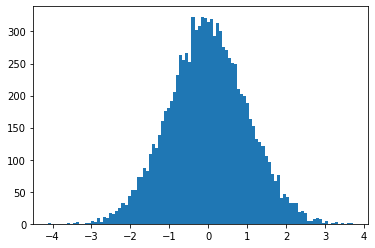

In [27]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

# 회귀
## 선형 회귀(Linear Regression)

회귀는 머신러닝에서 가장 기초적인 데이터 분석 방법 중 하나입니다.

그중 선형 회귀는 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것입니다. 선형 회귀에서 주로 사용되는 2차원에서의 직선이란 기울기와 y 절편을 가지는 좌표평면 위 점들의 집합입니다.

선형 회귀를 이용하면 2개의 데이터에 대한 경향성을 예측할 수 있습니다. 